# Importing Data and Basic Pre-Processing

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 918 kB/s eta 0:00:01


In [3]:
# df = pd.read_excel("../input/auto-eval/Tutorial 1_corrected(1-1174).xlsx", "Q8", usecols = [3, 6, 7, 8] ,engine="openpyxl")
# df = pd.read_excel("../input/tutorial-1-corrected/Tutorial 1_corrected(1-1174).xlsx", "Q7", usecols = [5, 6, 7, 8, 9], engine = 'openpyxl')
df = pd.read_excel("../input/plagiarismremovedpsat/plaigiarism removed.xlsx", "q11 tut1", usecols = [3,4,5], engine = 'openpyxl')

In [4]:
df.head()

,Explanation for question 11 here,Points - Question 11 - CO4,Rationale Score
0,"The result is 2 0 2 0 2 . Yes , the value of i...",0.0,0.0
1,Yes the value of i changes 5 times. It alterna...,0.0,0.0
2,The value of I dosent change.\nI value remains...,3.0,1.5
3,"Yes, the value of i keeps changing between 1 a...",0.0,0.0
4,"yes, the value of i is changed during the exec...",0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Explanation for question 11 here  925 non-null    object 
 1   Points - Question 11 - CO4        925 non-null    float64
 2   Rationale Score                   925 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.8+ KB


In [6]:
# df['Points - Question 11 - CO4.1'].unique()
# df['Rationale Score(1.5)'].unique()

In [7]:
df["Explanation for question 11 here"].replace(0, np.nan, inplace = True)
# df["Give explanation for Question 7 here:"].replace(0, np.nan, inplace = True)
x = df.dropna()
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 924
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Explanation for question 11 here  925 non-null    object 
 1   Points - Question 11 - CO4        925 non-null    float64
 2   Rationale Score                   925 non-null    float64
dtypes: float64(2), object(1)
memory usage: 28.9+ KB


In [8]:
x['Column1_lower'] = x['Explanation for question 11 here'].astype(str).str.lower().str.strip()
# duplicates = x.duplicated(subset='Column1_lower')
# duplicates.describe()

In [9]:
y = x[x.duplicated(subset='Column1_lower')]
len(y)

2

In [10]:
# print(y.loc[1123]['Give explanation for Question 7 here:'])
# print(y.loc[1012]['Give explanation for Question 7 here:'])
len(y)

2

In [11]:
x.drop_duplicates(subset = 'Column1_lower', keep = 'first', inplace = True)
x.drop('Column1_lower', axis=1, inplace=True)
x.reset_index(inplace=True, drop=True)

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Explanation for question 11 here  923 non-null    object 
 1   Points - Question 11 - CO4        923 non-null    float64
 2   Rationale Score                   923 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.8+ KB


In [13]:
# x['Points - Question 11 - CO4.1'] = x['Points - Question 11 - CO4.1'] - (x['Points - Question 11 - CO4']/2)
# # # x['Points - Question 12 - CO4.1'] = x['Points - Question 12 - CO4.1'] - 1.5
# # # x.loc[df['Points - Question 12 - CO4.1'] < 0, 'Points - Question 12 - CO4.1'] = 0
# # # x.sample(5)
# x['Points - Question 11 - CO4.1'].unique()

In [14]:
# x["Points - Question 11 - CO4.1"].replace(-1.5, np.nan, inplace = True)
# x = x.dropna()
# x['Points - Question 11 - CO4.1'].unique()

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Explanation for question 11 here  923 non-null    object 
 1   Points - Question 11 - CO4        923 non-null    float64
 2   Rationale Score                   923 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.8+ KB


In [16]:
# x['Points - Question 12 - CO4.1'].unique()

In [17]:
# x.groupby('Points - Question 11 - CO4.1').count()
x.groupby('Rationale Score').count()
#x.groupby('Rationale Score(1.5)').count()

,Explanation for question 11 here,Points - Question 11 - CO4
Rationale Score,,
0.0,384,384
0.5,8,8
1.0,5,5
1.5,526,526


In [18]:
# a = x[x['Rationale Score(1.5)'] == 0.5]
# b = x[x['Rationale Score(1.5)'] == 1.5]
# c = x[x['Rationale Score(1.5)'] == 1.0]
# d = x[x['Rationale Score(1.5)'] == 0.0].sample(100)

# x = pd.concat([a,b,c,d])
# # x.head()

# x = x.sample(frac=1)
# x.head()

In [19]:
# x.info()

### I refrained from most text pre-processing steps because
### 1. Stop word removal - words like "and", "for", "while" hold meaning in a computer science context
### 2. Lowercasing - could change the representation of variables - i is different from I
### 3. Lemmatization - could be done but since none of the other steps for words have been performed it wouldnt make much of a difference

In [20]:

x_original = pd.DataFrame(x)


In [21]:
x_original.shape

(923, 3)

# Text Vectorization - BERT

In [22]:
import torch
import transformers as ppb
import warnings
# import csv
warnings.filterwarnings('ignore')

## Tf-IDF Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer()

In [25]:
tf_idf_tokens = vectorizer.fit_transform(x['Explanation for question 11 here'])

In [26]:
text_vec = tf_idf_tokens

In [27]:
# # For DistilBERT:
# ###### We're using DistilBERT. DistilBERT is a smaller version of BERT developed and open sourced by the team at HuggingFace. 
# #It’s a lighter and faster version of BERT that roughly matches its performance.
# model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# ## Want BERT instead of distilBERT? Uncomment the following line:
# #model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# # Load pretrained model/tokenizer
# tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
# model = model_class.from_pretrained(pretrained_weights)

In [28]:
# tokenized_text = x['Explanation for question 11 here'].apply((lambda y: tokenizer.encode(y, add_special_tokens=True))) 
# #print(tokenized_text)
# max_len = 0
# for i in tokenized_text.values:
#   if len(i) > max_len:
#     max_len = len(i)

# padded_text = np.array([i + [0]*(max_len-len(i)) for i in tokenized_text.values])
# print(np.array(padded_text).shape)

# attention_mask_text = np.where(padded_text != 0, 1, 0)
# print(attention_mask_text.shape)

In [29]:
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# input_ids_text = torch.tensor(padded_text)  
# att_mask_text = torch.tensor(attention_mask_text)  

# text_data = TensorDataset(input_ids_text, att_mask_text)
# text_dataloader = DataLoader(text_data,batch_size=32)

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
print(device)
print(n_gpu)
torch.cuda.get_device_name(0)

cuda
1


'Tesla P100-PCIE-16GB'

In [31]:
# features_text = []
# for step, batch in enumerate(text_dataloader):
#     # Add batch to GPU
#     batch = tuple(t.to(device) for t in batch)
#     # Unpack the inputs from our dataloader
#     input_ids_text, attention_mask_text = batch
#     # Get the features
#     model.to(device)
#     with torch.no_grad():
#         last_hidden_states = model(input_ids_text, attention_mask=attention_mask_text)
#     features_text_batch = (last_hidden_states[0][:,0,:]).detach().cpu().numpy()  
#     print(features_text_batch.shape)
#     #append to the feature vector
#     features_text.append(features_text_batch)

In [32]:
# SAMPLES = np.asarray(features_text).shape[0]
# BATCH_SIZE = 32

In [33]:
# np.asarray(features_text).shape

In [34]:
# print(features_text[28].shape)

In [35]:
# features_text_2 = []
# for i in range(28):
#     for j in range(32):
#         features_text_2.append(features_text[i][j])
# try:    
#     for j in range(27): #26
#         features_text_2.append(features_text[28][j])
# except:
#     pass

In [36]:
# len(features_text_2)

In [37]:
x.to_csv("plagchecktut1q11.csv")

In [38]:
import pickle
pick_out = open("q11 tut1 textvec", 'wb')
pickle.dump(text_vec, pick_out)
pick_out.close()

# Text Similarity Analysis

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
#let's calculate cosine similarity for sentence 0:
similarities = cosine_similarity(text_vec,text_vec)

In [40]:
similarities.shape

(923, 923)

In [41]:
similarities = similarities**2

In [42]:
similarities

array([[1.        , 0.22311413, 0.01289621, ..., 0.01298109, 0.24042776,
        0.18113248],
       [0.22311413, 1.        , 0.00999053, ..., 0.01021195, 0.17137076,
        0.12889177],
       [0.01289621, 0.00999053, 1.        , ..., 0.01284925, 0.01161271,
        0.03603472],
       ...,
       [0.01298109, 0.01021195, 0.01284925, ..., 1.        , 0.01187008,
        0.04692856],
       [0.24042776, 0.17137076, 0.01161271, ..., 0.01187008, 1.        ,
        0.2435109 ],
       [0.18113248, 0.12889177, 0.03603472, ..., 0.04692856, 0.2435109 ,
        1.        ]])

In [43]:
print(np.mean(similarities))

0.03816849424253688


In [44]:
print(np.std(similarities))

0.06651076766886568


In [45]:
indices = []
for i in range(len(similarities)):
    avg = np.mean(similarities[i])
    if avg>= np.mean(similarities):
        indices.append(int(i))

In [46]:
len(indices)

395

In [47]:
#x.loc[801,:]

In [48]:
x.reset_index(inplace=True)
x.drop(indices, inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 2 to 920
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             528 non-null    int64  
 1   Explanation for question 11 here  528 non-null    object 
 2   Points - Question 11 - CO4        528 non-null    float64
 3   Rationale Score                   528 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.6+ KB


In [49]:
x.groupby("Rationale Score").count()

,index,Explanation for question 11 here,Points - Question 11 - CO4
Rationale Score,,,
0.0,238,238,238
0.5,8,8,8
1.0,5,5,5
1.5,277,277,277


In [50]:
original = text_vec

In [51]:
array_vec = text_vec.todense()
new_vec = np.delete(np.array(array_vec), indices, axis = 0)
len(new_vec)

528

In [52]:
text_vec = new_vec

In [53]:
np.array(original).shape == np.array(text_vec).shape

False

# BIRCH

In [54]:
!pip install pyclustering
!pip install scikit-learn-extra
!pip install bert-extractive-summarizer
!pip install neuralcoref
!pip install spacy

!pip install fuzzy-c-means
!pip install kmodes

     |████████████████████████████████| 2.6 MB 936 kB/s eta 0:00:01     |██████████████▊                 | 1.2 MB 936 kB/s eta 0:00:02     |████████████████████████████▍   | 2.3 MB 936 kB/s eta 0:00:01
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=c3e668971d0c873b6f5047efa1079cbe41eaded9fb6805e7d5698f49c647784a
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering
     |████████████████████████████████| 1.7 MB 926 kB/s eta 0:00:01
     |████████████████████████████████| 286 kB 901 kB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 900 kB/s  eta 0:00:01
  Attempting uninstall: click
    Found existing installation: click 8.0.1
    Uninstalling click-8.0.1:
      Successfully uninstalled click-8.0.1
  Attempting uninstall: typer
    Found existing installation: typer 0.

In [55]:
# !pip install som-learn
# from sklearn_som.som import SOM
# from somlearn import SOM
# som = SOM(n_columns=2, n_rows=2, random_state=1)
# #som.fit(text_vec.toarray())
# labels = som.fit_predict(text_vec)#.toarray())
# # predictions = som.predict(feature_vec)

In [56]:
x

,index,Explanation for question 11 here,Points - Question 11 - CO4,Rationale Score
2,2,The value of I dosent change.\nI value remains...,3.0,1.5
5,5,N\tj\ti\tOutput\n - - 1 -\n10\t...,1.5,1.5
7,7,"input N=10,j=5-as it is odd i=i+1=2\n ...",1.5,0.0
10,10,FIRST SEE GIVEN VALUE IS ODD OR EVEN THAN SUBS...,1.5,0.0
14,14,"no,value of i does not change since we didnot ...",1.5,1.5
...,...,...,...,...
908,908,its fibonacci series i is not getting updated ...,3.0,1.5
913,913,"Here the value changes for 5 times, since ther...",1.5,0.0
915,915,the value of i does not change because i is no...,3.0,1.5
916,916,5 times because the condition fails if j becom...,1.5,0.0


With removed similar items

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8727.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8733.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8731.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8731.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8729.0
Best run was number 1


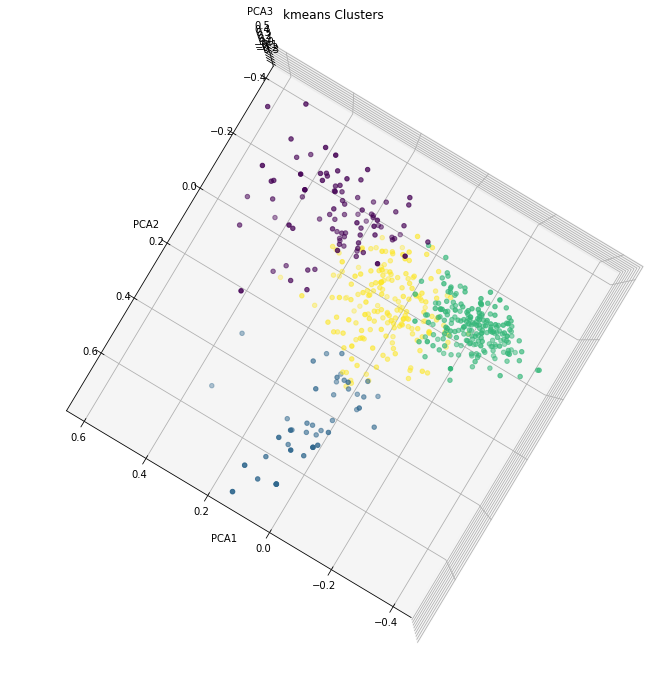

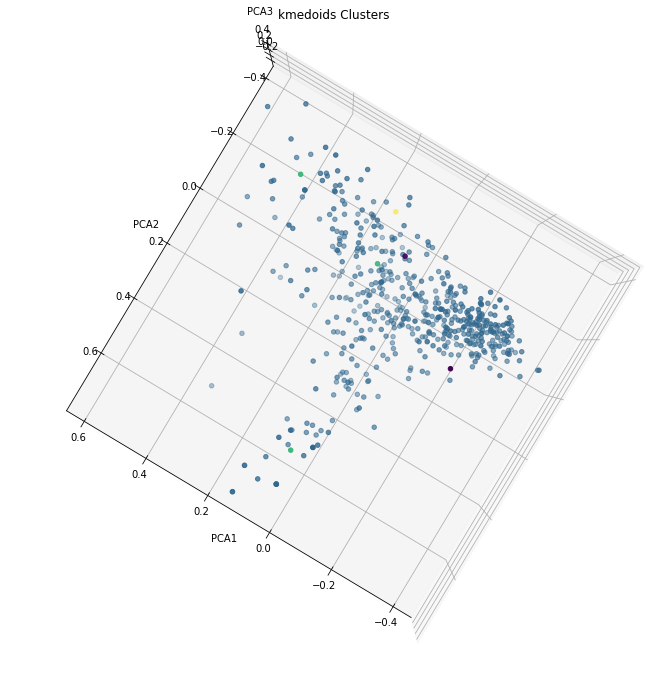

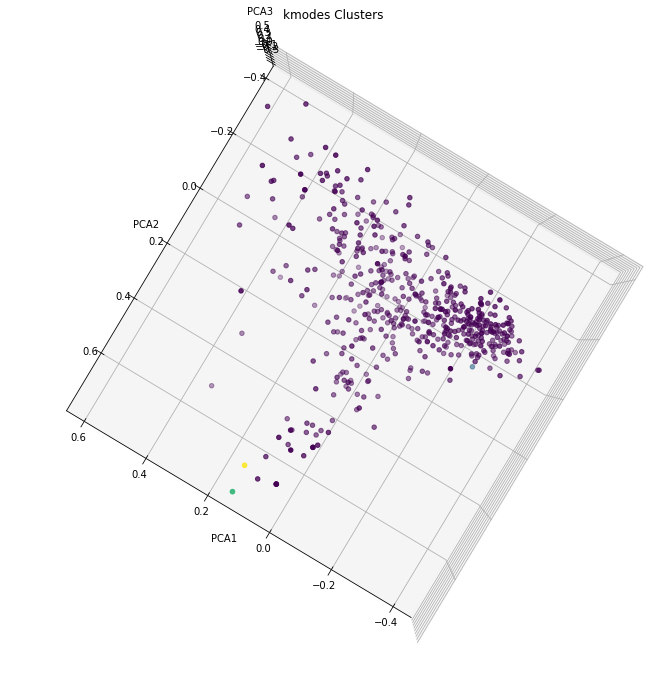

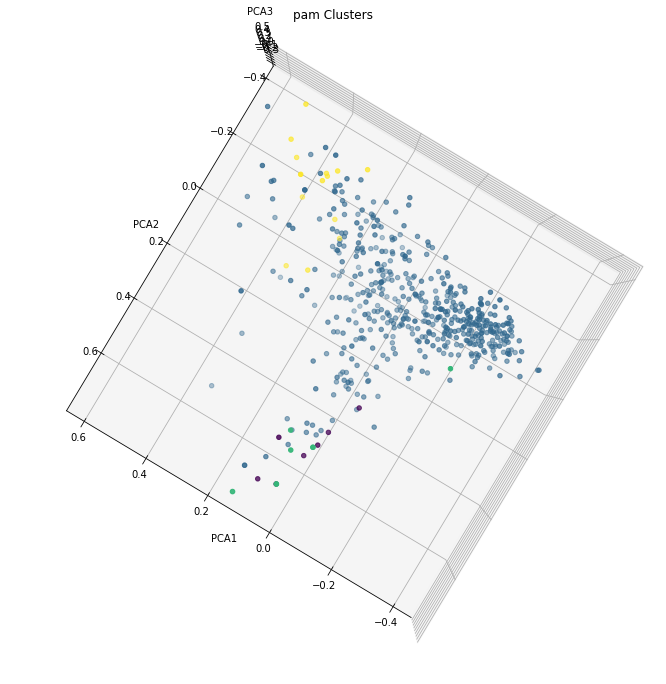

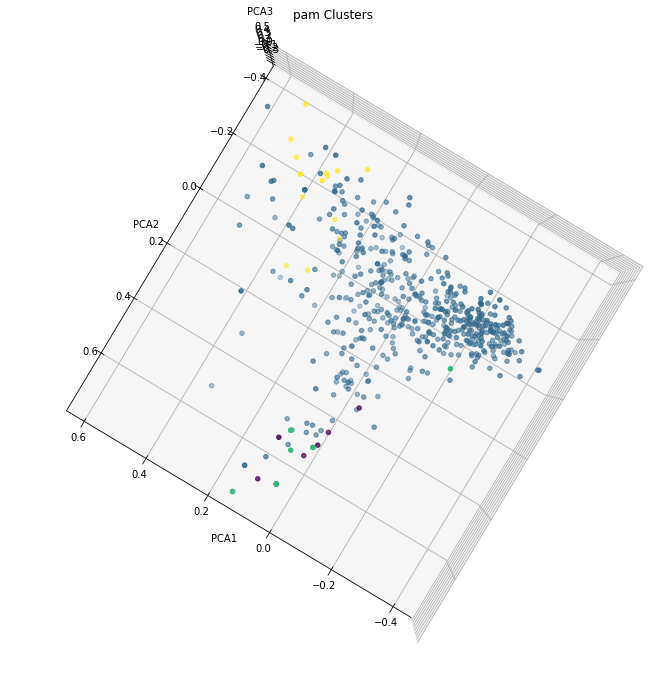

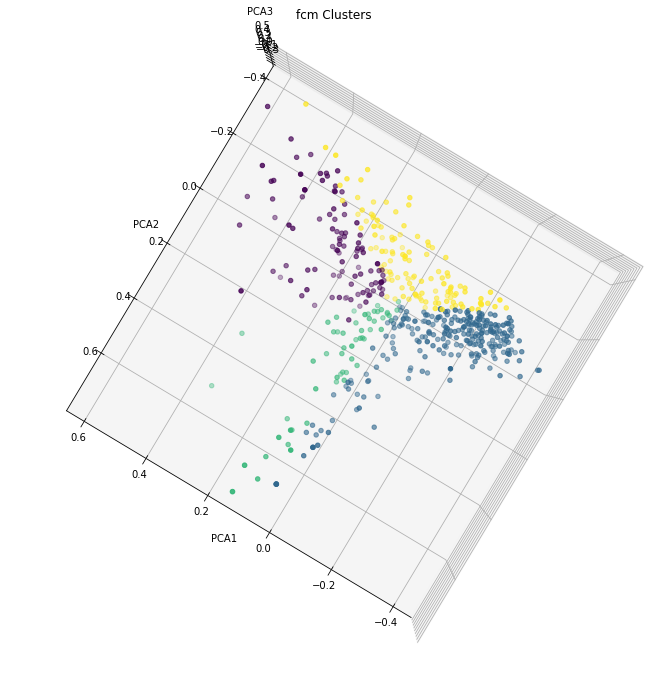

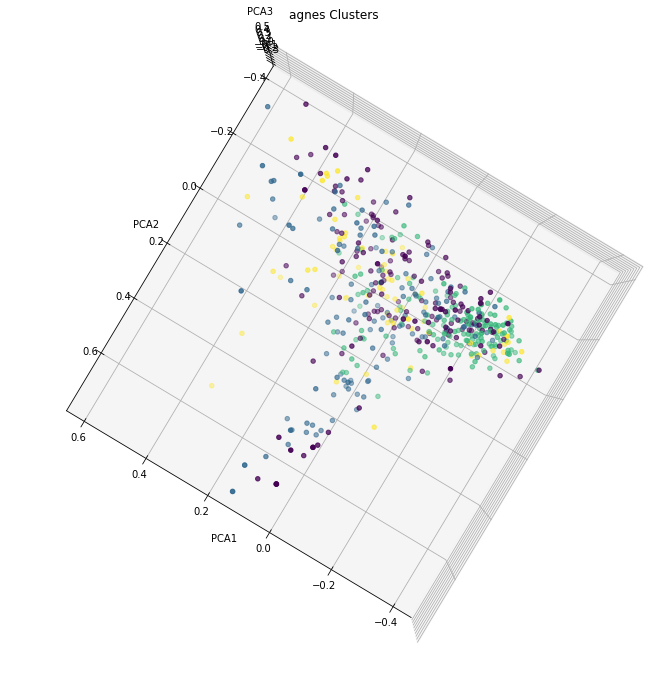

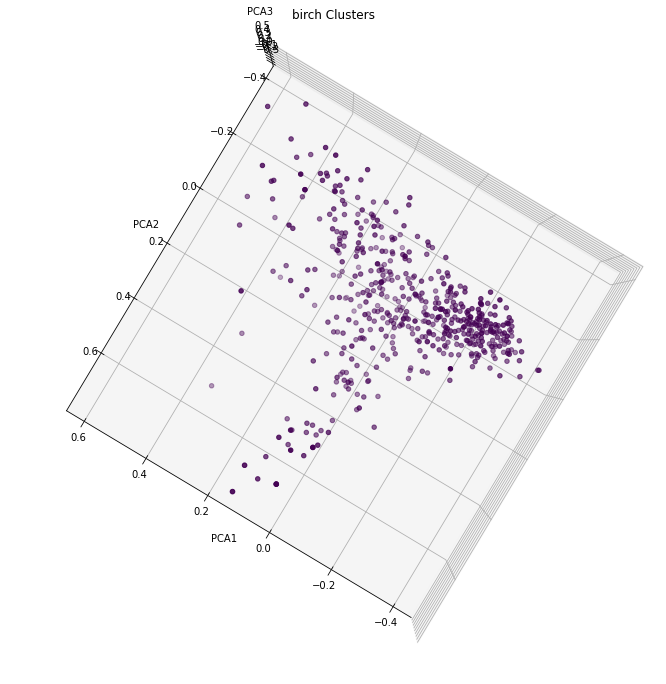

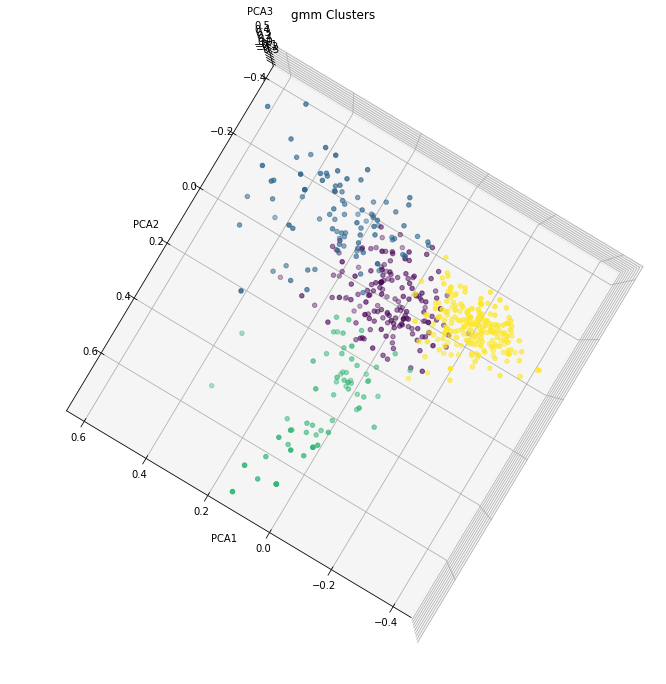

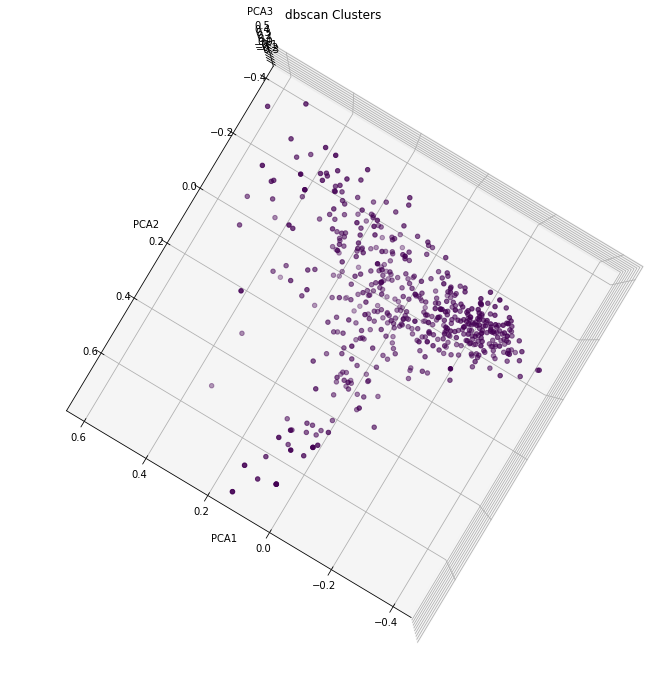

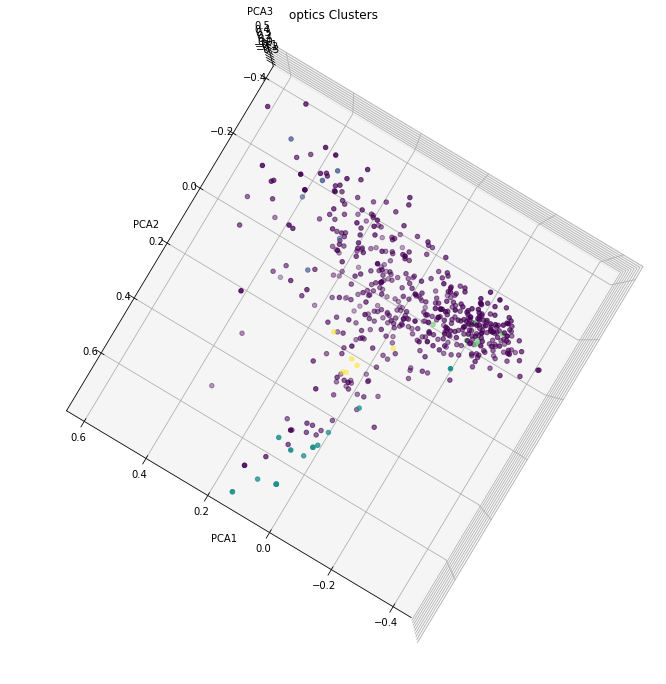

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from summarizer import Summarizer
from mpl_toolkits import mplot3d

model = Summarizer()

for i in range(11):
    if i == 0:
        title = "kmeans"
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=4, random_state=0).fit(text_vec)
        preds = kmeans.labels_
    if i == 1:
        title = "kmedoids"
        from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
        kmedoids = KMedoids(n_clusters=4, method = 'alternate' ,random_state=0).fit(text_vec)
        preds = kmedoids.labels_
    if i == 2:
        title = "kmodes"
        from kmodes.kmodes import KModes
        kmode = KModes(n_clusters=4, init = "Huang", n_init = 5, verbose=1)
        preds = kmode.fit_predict(text_vec)
    if i == 3:
        title = "pam"
        from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
        kmedoids = KMedoids(n_clusters=4, method = 'pam' ,random_state=0).fit(text_vec)
        preds = kmedoids.labels_
    if i == 5:
        title = "fcm"
        from fcmeans import FCM
        fcm = FCM(n_clusters=4)
        fcm.fit(np.array(text_vec))
        preds = fcm.predict(np.array(text_vec))
    if i == 6:
        title = "agnes"
        from sklearn.cluster import AgglomerativeClustering
        preds = AgglomerativeClustering(n_clusters=4,linkage='complete').fit_predict(text_vec)
    if i == 7:
        title = "birch"
        from sklearn.cluster import Birch  
        birch = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)
        birch.fit(text_vec)
        preds = birch.predict(text_vec)
    if i == 8:
        title = "gmm"
        from sklearn.mixture import GaussianMixture
        gmm = GaussianMixture(n_components=4)
        gmm.fit(text_vec)
        preds = gmm.predict(text_vec)
    if i == 9:
        title = "dbscan"
        from sklearn.cluster import DBSCAN
        preds = DBSCAN(eps=2.5, min_samples=10).fit_predict(text_vec)
    if i == 10:
        title = "optics"
        from sklearn.cluster import OPTICS
        preds = OPTICS(min_samples=5).fit_predict(text_vec)
    
    
    # reduce the features to 2D
    pca = PCA(n_components=3)
    reduced_features = pca.fit_transform(text_vec)#.toarray())
    reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
    a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    ax.scatter3D(a1, a2, a3, c=preds)
    ax.view_init(90, 120)
    plt.title(title + " Clusters")
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.savefig(title + '.png')
    
    x['labels_'+title] = preds
    # print(type(x))
    body1 = ''
    body2 = ''
    body3 = ''
    body4 = ''
    for i in range(len(x)):
        if x.iloc[i]['labels_'+title] == 0:
            body1 = body1 + " " + x.iloc[i]['Explanation for question 11 here']
        elif x.iloc[i]['labels_'+title] == 1:
            body2 = body2 + " " + x.iloc[i]['Explanation for question 11 here']
        elif x.iloc[i]['labels_'+title] == 2:
            body3 = body3 + " " + x.iloc[i]['Explanation for question 11 here']
        elif x.iloc[i]['labels_'+title] == 3:
            body4 = body4 + " " + x.iloc[i]['Explanation for question 11 here']
        elif x.iloc[i]['labels_'+title] == -1:
            body4 = body4 + " " + x.iloc[i]['Explanation for question 11 here']
    
    result1 = model(body1,num_sentences=5)
    result2 = model(body2,num_sentences=5)
    result3 = model(body3,num_sentences=5)
    result4 = model(body4,num_sentences=5)
    
    file = open("summaries_"+title+".txt", "w")
    file.write("SUMMARY 0\n")
    file.write(result1 +"\n\n")
    file.write("SUMMARY 1\n")
    file.write(result2 +"\n\n")
    file.write("SUMMARY 2\n")
    file.write(result3 +"\n\n")
    file.write("SUMMARY 3/-1\n")
    file.write(result4 +"\n\n")
    file.close()

In [58]:
x.to_csv("plagcheckpredsq11tut1.csv")

Without removing similar ones

In [59]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# from summarizer import Summarizer
# from mpl_toolkits import mplot3d

# model = Summarizer()

# for i in range(11):
#     try:
#         if i == 0:
#             title = "kmeans"
#             from sklearn.cluster import KMeans
#             kmeans = KMeans(n_clusters=4, random_state=0).fit(original)
#             preds = kmeans.labels_
#         if i == 1:
#             title = "kmedoids"
#             from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
#             kmedoids = KMedoids(n_clusters=4, method = 'alternate' ,random_state=0).fit(original)
#             preds = kmedoids.labels_
#         if i == 2:
#             title = "kmodes"
#             from kmodes.kmodes import KModes
#             kmode = KModes(n_clusters=4, init = "Huang", n_init = 5, verbose=1)
#             preds = kmode.fit_predict(original)
#         if i == 3:
#             title = "pam"
#             from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
#             kmedoids = KMedoids(n_clusters=4, method = 'pam' ,random_state=0).fit(original)
#             preds = kmedoids.labels_
#         if i == 5:
#             title = "fcm"
#             from fcmeans import FCM
#             fcm = FCM(n_clusters=4)
#             fcm.fit(np.array(text_vec))
#             preds = fcm.predict(np.array(original))
#         if i == 6:
#             title = "agnes"
#             from sklearn.cluster import AgglomerativeClustering
#             preds = AgglomerativeClustering(n_clusters=4,linkage='complete').fit_predict(original)
#         if i == 7:
#             title = "birch"
#             from sklearn.cluster import Birch  
#             birch = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)
#             birch.fit(text_vec)
#             preds = birch.predict(original)
#         if i == 8:
#             title = "gmm"
#             from sklearn.mixture import GaussianMixture
#             gmm = GaussianMixture(n_components=4)
#             gmm.fit(text_vec)
#             preds = gmm.predict(original)
#         if i == 9:
#             title = "dbscan"
#             from sklearn.cluster import DBSCAN
#             preds = DBSCAN(eps=2.5, min_samples=10).fit_predict(original)
#         if i == 10:
#             title = "optics"
#             from sklearn.cluster import OPTICS
#             preds = OPTICS(min_samples=5).fit_predict(original)
#     except:
#         pass
    
    
#     # reduce the features to 2D
#     pca = PCA(n_components=3)
#     reduced_features = pca.fit_transform(original.todense())#.toarray())
#     reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
#     a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
#     fig = plt.figure(figsize=(12,12))
#     ax = plt.axes(projection='3d')
#     ax.scatter3D(a1, a2, a3, c=preds)
#     ax.view_init(45, 90)
#     plt.title(title + " Clusters")
#     ax.set_xlabel('PCA1')
#     ax.set_ylabel('PCA2')
#     ax.set_zlabel('PCA3')
#     plt.savefig(title + 'original.png')
    
#     x_original['labels_'+title] = preds
#     # print(type(x))
#     body1 = ''
#     body2 = ''
#     body3 = ''
#     body4 = ''
#     for i in range(len(x_original)):
#         if x_original.iloc[i]['labels_'+title] == 0:
#             body1 = body1 + " " + x_original.iloc[i]['Explanation for question 11 here']
#         elif x_original.iloc[i]['labels_'+title] == 1:
#             body2 = body2 + " " + x_original.iloc[i]['Explanation for question 11 here']
#         elif x_original.iloc[i]['labels_'+title] == 2:
#             body3 = body3 + " " + x_original.iloc[i]['Explanation for question 11 here']
#         elif x_original.iloc[i]['labels_'+title] == 3:
#             body4 = body4 + " " + x_original.iloc[i]['Explanation for question 11 here']
#         elif x_original.iloc[i]['labels_'+title] == -1:
#             body4 = body4 + " " + x_original.iloc[i]['Explanation for question 11 here']
    
#     result1 = model(body1,num_sentences=5)
#     result2 = model(body2,num_sentences=5)
#     result3 = model(body3,num_sentences=5)
#     result4 = model(body4,num_sentences=5)
    
#     file = open("summaries_original_"+title+".txt", "w")
#     file.write("SUMMARY 0\n")
#     file.write(result1 +"\n\n")
#     file.write("SUMMARY 1\n")
#     file.write(result2 +"\n\n")
#     file.write("SUMMARY 2\n")
#     file.write(result3 +"\n\n")
#     file.write("SUMMARY 3/-1\n")
#     file.write(result4 +"\n\n")
#     file.close()

In [60]:
# #With original scores

# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# # from summarizer import Summarizer
# from sklearn.cluster import DBSCAN

# # pca = PCA(n_components=2)
# # reduced_features = pca.fit_transform(text_vec)#.toarray())

# pca = PCA(n_components=3)
# reduced_features = pca.fit_transform(original.todense())
# color_dict = { 0.0:0, 0.5:1, 1.0:2, 1.5:3}
# #plt.scatter(reduced_features[:,0], reduced_features[:,1],c = [color_dict[i] for i in x['Rationale Score(1.5)']])
# reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
# a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
# fig = plt.figure(figsize = (12,12))
# ax = plt.axes(projection='3d')
# ax.scatter3D(a1, a2, a3, c = [color_dict[i] for i in x_original['Rationale Score']])
# ax.view_init(45, 90)
# ax.set_xlabel('PCA1')
# ax.set_ylabel('PCA2')
# ax.set_zlabel('PCA3')
# plt.savefig('Original Clusters for All Scores' + '.png')
# plt.legend()
# plt.title("Original Clusters")

Text(0.5, 0.92, 'Original Clusters')

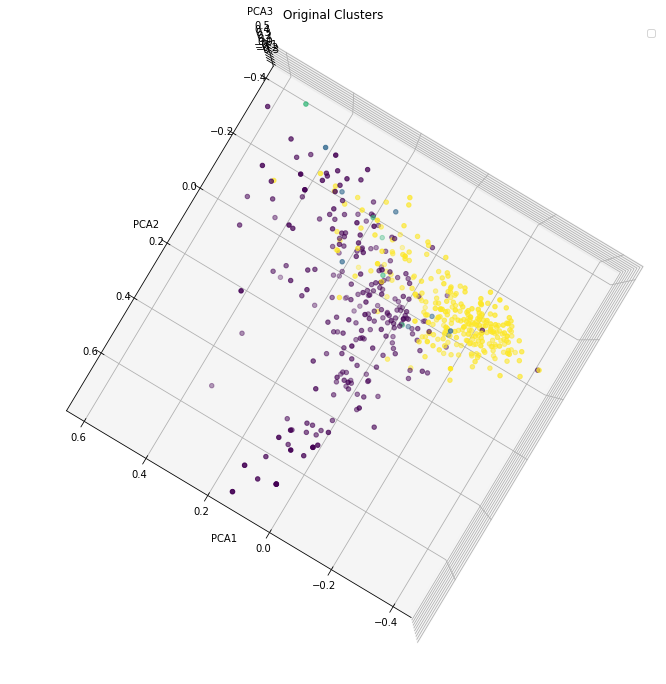

In [61]:
#With removed similar scores

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from summarizer import Summarizer
from sklearn.cluster import DBSCAN

# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(text_vec)
color_dict = { 0.0:0, 0.5:1, 1.0:2, 1.5:3}
#plt.scatter(reduced_features[:,0], reduced_features[:,1],c = [color_dict[i] for i in x['Rationale Score(1.5)']])
reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
ax.scatter3D(a1, a2, a3, c = [color_dict[i] for i in x['Rationale Score']])
ax.legend()
ax.view_init(90, 120)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.savefig('Original Clusters for Less Similar Scores' + '.png')

plt.title("Original Clusters")

#model = Summarizer()

# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(text_vec)
reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']


title = "DBSCAN"
preds = DBSCAN(eps=2.5, min_samples=10).fit_predict(text_vec)
# from sklearn.cluster import OPTICS
# preds = OPTICS(min_samples=4).fit_predict(text_vec)

# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4, random_state=0).fit(text_vec)
# preds = kmeans.labels_

# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=preds)
    
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
ax.scatter3D(a1, a2, a3, c = preds)
ax.view_init(90,120)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
# plt.savefig(title + '.png')
plt.title(title + " Clusters")

#plt.savefig(title + '.png')

x['labels_'+title] = preds

body1 = ''
body2 = ''
body3 = ''
body4 = ''
for i in range(len(x)):
    if x.iloc[i]['labels_'+title] == 0:
        body1 = body1 + " " + x.iloc[i]['Explanation for question 11 here']
    elif x.iloc[i]['labels_'+title] == 1:
        body2 = body2 + " " + x.iloc[i]['Explanation for question 11 here']
    elif x.iloc[i]['labels_'+title] == 2:
        body3 = body3 + " " + x.iloc[i]['Explanation for question 11 here']
    elif x.iloc[i]['labels_'+title] == 3:
        body4 = body4 + " " + x.iloc[i]['Explanation for question 11 here']
    elif x.iloc[i]['labels_'+title] == -1:
        body4 = body4 + " " + x.iloc[i]['Explanation for question 11 here']

result1 = model(body1,num_sentences=5)
result2 = model(body2,num_sentences=5)
result3 = model(body3,num_sentences=5)
result4 = model(body4,num_sentences=5)

file = open("temp_summaries_"+title+".txt", "w")
file.write("SUMMARY 0\n")
file.write(result1 +"\n\n")
file.write("SUMMARY 1\n")
file.write(result2 +"\n\n")
file.write("SUMMARY 2\n")
file.write(result3 +"\n\n")
file.write("SUMMARY 3/-1\n")
file.write(result4 +"\n\n")
file.close()

print("Done.")

In [62]:
x.groupby("labels_kmeans").count()

,index,Explanation for question 11 here,Points - Question 11 - CO4,Rationale Score,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics
labels_kmeans,,,,,,,,,,,,,
0,90,90,90,90,90,90,90,90,90,90,90,90,90
1,46,46,46,46,46,46,46,46,46,46,46,46,46
2,206,206,206,206,206,206,206,206,206,206,206,206,206
3,186,186,186,186,186,186,186,186,186,186,186,186,186


In [63]:
#x_original.groupby("labels_kmeans").count()

In [64]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# from summarizer import Summarizer

# title = "clarans"
# from pyclustering.cluster.clarans import clarans
# clara_instance = clarans(text_vec, 4, 1, 5)
# clara_instance.process()
# clusters = clara_instance.get_clusters()
# preds = [0]*1082
# for j in range(4):
#     for i in clusters[j]:
#         preds[i] = j


# # reduce the features to 2D
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())
# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=preds)
# plt.title(title + " Clusters")
# plt.savefig(title + '.png')

# x['labels_'+title] = preds

# body1 = ''
# body2 = ''
# body3 = ''
# body4 = ''
# for i in range(len(x)):
#     if x.iloc[i]['labels_'+title] == 0:
#         body1 = body1 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == 1:
#         body2 = body2 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == 2:
#         body3 = body3 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == 3:
#         body4 = body4 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == -1:
#         body4 = body4 + " " + x.iloc[i]['Explanation for question 12 here']
            
# model = Summarizer()

# result1 = model(body1,num_sentences=5)
# result2 = model(body2,num_sentences=5)
# result3 = model(body3,num_sentences=5)
# result4 = model(body4,num_sentences=5)

# file = open("summaries_"+title+".txt", "w")
# file.write("SUMMARY 0\n")
# file.write(result1 +"\n\n")
# file.write("SUMMARY 1\n")
# file.write(result2 +"\n\n")
# file.write("SUMMARY 2\n")
# file.write(result3 +"\n\n")
# file.write("SUMMARY 3/-1\n")
# file.write(result4 +"\n\n")
# file.close()

# x.to_csv("preds for clarans q7 tut1")

In [65]:
# import collections
# frequency = collections.Counter(preds)
# print(dict(frequency))

In [66]:
# from pyclustering.cluster.clique import clique
# # create CLIQUE algorithm for processing
# intervals = 1  # defines amount of cells in grid in each dimension
# threshold = 0   # lets consider each point as non-outlier
# clique_instance = clique(text_vec, intervals, threshold)
 
# # start clustering process and obtain results
# clique_instance.process()
# clusters = clique_instance.get_clusters()  # allocated clusters
# # noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
# # cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid



# from pyclustering.cluster.fcm import fcm
# from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
# # initialize
# initial_centers = kmeans_plusplus_initializer(text_vec, 2, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
 
# # create instance of Fuzzy C-Means algorithm
# fcm_instance = fcm(text_vec, initial_centers)
 
# # run cluster analysis and obtain results
# fcm_instance.process()
# clusters = fcm_instance.get_clusters()

# !pip install fuzzy-c-means
# from fcmeans import FCM
# fcm = FCM(n_clusters=4)
# fcm.fit(np.array(text_vec))
# preds = fcm.predict(np.array(text_vec))

In [67]:
# clusters = clara_instance.get_clusters()

In [68]:
#model.process()
# len(clusters)

In [69]:
# preds = [0]*1082
# # clus = model.get_clusters()
# for j in range(4):
#     for i in clusters[j]:
#         preds[i] = j


In [70]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # reduce the features to 2D
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())

# # reduce the cluster centers to 2D
# #reduced_cluster_centers = pca.transform(cls.cluster_centers_)


# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=preds)
# plt.title("CLARANS Clusters")
# #plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [71]:
# x['labels'] = preds

In [72]:
# x.groupby('Points - Question 12 - CO4.1').count()

In [73]:
# x.groupby('labels').count()

In [74]:
# !pip install bert-extractive-summarizer
# !pip install neuralcoref
# !pip install spacy

In [75]:
# from summarizer import Summarizer

# body1 = ''
# body2 = ''
# body3 = ''
# body4 = ''
# for i in range(len(x)):
#     if x.iloc[i]['labels'] == 0:
#         body1 = body1 + " " + x.iloc[i]['Give explanation for Question 7 here:']
#     elif x.iloc[i]['labels'] == 1:
#         body2 = body2 + " " + x.iloc[i]['Give explanation for Question 7 here:']
#     elif x.iloc[i]['labels'] == 2:
#         body3 = body3 + " " + x.iloc[i]['Give explanation for Question 7 here:']
#     elif x.iloc[i]['labels'] == 3:
#         body4 = body4 + " " + x.iloc[i]['Give explanation for Question 7 here:']
        
# model = Summarizer()

# result1 = model(body1,num_sentences=5)
# #body1_vec = model.run_embeddings(body1, num_sentences=5)

# result2 = model(body2,num_sentences=5)
# #body2_vec = model.run_embeddings(body2, num_sentences=5)

# result3 = model(body3,num_sentences=5)
# #body3_vec = model.run_embeddings(body3, num_sentences=5)

# result4 = model(body4,num_sentences=5)
# #body4_vec = model.run_embeddings(body4, num_sentences=5)

In [76]:
# result4

In [77]:
# correct_answer = "Among the given options Only option that can be quantifiable is about the number of people entering the airport. Other options are subjective to the situation which are not actually quantifiable"
# #correct_answer_vec = model.run_embeddings(correct_answer, ratio=1)

In [78]:
# body1_vec.shape

In [79]:
# !pip install gensim

In [80]:
# from sklearn.metrics.pairwise import cosine_similarity
# #let's calculate cosine similarity for sentence 0:
# cosine_similarity(
#     body1_vec,correct_answer_vec)

In [81]:
# import spacy
# nlp = spacy.load('en_core_web_sm')
# doc = nlp(correct_answer)
# doc1 = nlp(result1)
# doc2 = nlp(result2) 
# doc3 = nlp(result3)
# doc4 = nlp(result4)

# print (doc.similarity(doc1)) 
# print (doc.similarity(doc2))
# print (doc.similarity(doc3))
# print (doc.similarity(doc4))

In [82]:
# x = pd.read_csv("../input/predictionscluster-labels/preds for all q12 tut1.csv")
# x.drop("Unnamed: 0" ,axis=1,inplace=True)

In [83]:
# x.head(1)

In [84]:
# x.groupby('Points - Question 12 - CO4.1').count()

In [85]:
x.groupby('Rationale Score').count()

,index,Explanation for question 11 here,Points - Question 11 - CO4,labels_kmeans,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics
Rationale Score,,,,,,,,,,,,,
0.0,238,238,238,238,238,238,238,238,238,238,238,238,238
0.5,8,8,8,8,8,8,8,8,8,8,8,8,8
1.0,5,5,5,5,5,5,5,5,5,5,5,5,5
1.5,277,277,277,277,277,277,277,277,277,277,277,277,277


In [86]:
#x.loc[x['labels_dbscan'] == x['labels_DBSCAN']].shape

In [87]:
# x.shape

In [88]:
f = open('summaries_kmeans.txt', 'r')

In [89]:
f.read()

'SUMMARY 0\nThe given condition is if j is even then display i-1 . So i is not changed during the algorithm. 1) 5 is odd so i = i + 1( i =2 ) and j = j +1(j =6)\n2) updated value , 6 is even so i = i - 1 (i = 1) and j  is 7\n3) updated value , 7 is odd so i = i+1 ( i = 2) and j is 8\nso the only answer option 3 contains 212...... so i choose option 3.(2 1 2 1 2) N=10, j=5, i=1\nj is odd, so\nit will display as 2,\nj will become as 6,\nthen j is even, so\nit will display as 2 0,\nit will continue 5 times and the final output is,\n20202\ni will not change because it has its fixed value as 1 and no other variable was used to change i j is 5. As 5 is odd step two i.e (i+1)is performed so \'i\' value is 2. so whatever the value of N>=j and when j is even i is 0 and j is odd i is 2 first we take j as 5 which is odd it dissplays as 2(i+1), as given in step 4.2 and then j becomes j+1 which 6 and even so then we get 0(i-1) as given in step 4.1. j is odd, i+1 is displayed which is 2, j becomes 8

In [90]:
assigned_score = []
for i in x['labels_kmeans']:
    #print(i)
    if i == 0:
        assigned_score.append(0.5)
    elif i == 1:
        assigned_score.append(0)
    elif i == 2:
        assigned_score.append(1.5)
    else:
        assigned_score.append(1.0)

In [91]:
x['kmeans_assigned_score'] = assigned_score

In [92]:
x.head(10)

,index,Explanation for question 11 here,Points - Question 11 - CO4,Rationale Score,labels_kmeans,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics,kmeans_assigned_score
2,2,The value of I dosent change.\nI value remains...,3.0,1.5,2,1,0,1,1,2,0,3,0,-1,1.5
5,5,N\tj\ti\tOutput\n - - 1 -\n10\t...,1.5,1.5,3,1,0,1,3,3,0,0,0,-1,1.0
7,7,"input N=10,j=5-as it is odd i=i+1=2\n ...",1.5,0.0,0,1,0,1,0,0,0,1,0,-1,0.5
10,10,FIRST SEE GIVEN VALUE IS ODD OR EVEN THAN SUBS...,1.5,0.0,3,1,0,1,3,0,0,0,0,-1,1.0
14,14,"no,value of i does not change since we didnot ...",1.5,1.5,2,1,0,1,1,3,0,3,0,-1,1.5
15,15,N\tj\ti\tOutput\n10\t5\t2\t2\n10\t6\t0\t0\n10\...,3.0,1.5,3,1,0,1,0,3,0,0,0,-1,1.0
17,17,That’s it,0.0,0.0,3,1,0,1,1,0,0,0,0,-1,1.0
19,19,NO IT WONT BE CHANGING BECAUSE IT IS CLEARLY G...,3.0,1.5,2,1,0,1,3,0,0,3,0,-1,1.5
20,20,the value of i changes continuously as if j=5 ...,0.0,0.0,3,1,0,1,2,0,0,0,0,-1,1.0
21,21,"as it is under a loop , so it will stop at one...",1.5,0.0,3,1,0,1,2,0,0,2,0,-1,1.0


In [93]:
# from sklearn.metrics import mean_squared_error

# mean_squared_error(x['Points - Question 12 - CO4.1'], x['kmeans_assigned_score'])

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print(classification_report(x['kmeans_assigned_score'].astype("str"), x['Rationale Score'].astype("str"), digits = 3))
#accuracy_score(x['Rationale Score(1.5)'].astype("str"), x['dbscan_assigned_score'].astype("str"))

              precision    recall  f1-score   support

         0.0      0.193     1.000     0.324        46
         0.5      0.375     0.033     0.061        90
         1.0      0.600     0.016     0.031       186
         1.5      0.733     0.985     0.841       206

    accuracy                          0.483       528
   macro avg      0.475     0.509     0.314       528
weighted avg      0.578     0.483     0.378       528



In [95]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(x['Rationale Score'].astype("str"), x['kmeans_assigned_score'].astype("str"))

0.3107247374763299

In [96]:
# indices = [14,15,19,20,26,34,48,56,64,69,80,84,96,105,107,112,120,126,151,188,190,196,197,200,215,216,223,232,239,268,275,281,286,323,325,329,335,337,345,355,367,370,379,380,383,384,386,415,424,427,428,431,435,437,445,452,464,477,494,500,502,518,523,568,573,579,584,592,604,610,642,652,655,657,674,684,705,709,717,724,751,753,770,778,779,800,812,813,818,824,825,830,835,839,860,905,925,927,946,949,950,973,977,979,993,1012,1013,1014,1036,1038,1047,1048,1049,1057,1060] 
# for i in indices:
#      x['dbscan_assigned_score'].iloc[i] = x['Rationale Score(1.5)'].iloc[i]

In [97]:
mismatch = x[x['Rationale Score'] != x['kmeans_assigned_score']]

In [98]:
mismatch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 5 to 916
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             273 non-null    int64  
 1   Explanation for question 11 here  273 non-null    object 
 2   Points - Question 11 - CO4        273 non-null    float64
 3   Rationale Score                   273 non-null    float64
 4   labels_kmeans                     273 non-null    int32  
 5   labels_kmedoids                   273 non-null    int64  
 6   labels_kmodes                     273 non-null    uint16 
 7   labels_pam                        273 non-null    int64  
 8   labels_fcm                        273 non-null    int64  
 9   labels_agnes                      273 non-null    int64  
 10  labels_birch                      273 non-null    int64  
 11  labels_gmm                        273 non-null    int64  
 12  labels_d

In [99]:
x.to_excel("clusters and scores.xlsx")

In [100]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y = label_binarize(x['Rationale Score'].astype("str"), classes=['0.0', '0.5', '1.0', '1.5'])
y_dbscan = label_binarize(x['kmeans_assigned_score'].astype("str"), classes=['0.0', '0.5', '1.0', '1.5'])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_dbscan[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_dbscan.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

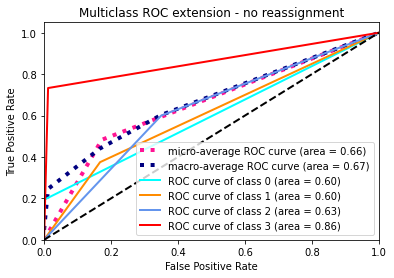

In [101]:
lw = 2
n_classes=4
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC extension - no reassignment')
plt.legend(loc="lower right")
plt.show()

In [102]:
print(classification_report([0,1,2,1,1,2,0], [0,3,2,1,1,0,0], digits = 3))
cohen_kappa_score([0,1,2,1,1,2,0], [0,3,2,1,1,0,0])

              precision    recall  f1-score   support

           0      0.667     1.000     0.800         2
           1      1.000     0.667     0.800         3
           2      1.000     0.500     0.667         2
           3      0.000     0.000     0.000         0

    accuracy                          0.714         7
   macro avg      0.667     0.542     0.567         7
weighted avg      0.905     0.714     0.762         7



0.6

In [103]:
# # from statsmodels.stats.inter_rater import fleiss_kappa
# # z = [x['Rationale Score(1.5)'], x['assigned_score']]
# # fleiss_kappa(z, method='fleiss')

# from nltk import agreement
# # formatted_codes = [[1,i,coder1[i]] for i in range(len(coder1))] + [[2,i,coder2[i]] for i in range(len(coder2))]  + [[3,i,coder3[i]] for i in range(len(coder3))]
# formatted_codes = [[1 , i, x.iloc[i]['Rationale Score(1.5)'].astype("str")] for i in range(len(x))] + [[2,i,x.iloc[i]['kmedoids_assigned_score'].astype("str")] for i in range(len(x))]


# ratingtask = agreement.AnnotationTask(data=formatted_codes)

# print('Fleiss\'s Kappa:',ratingtask.multi_kappa())

### J=sensitivity+specificity−1   

In [104]:
# from sklearn.metrics import confusion_matrix
# import math

# cnf_matrix = confusion_matrix(x['Points - Question 12 - CO4.1'].astype("str"), x['kmeans_assigned_score'].astype("str"))
# # print(cnf_matrix)
# FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
# FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
# TP = np.diag(cnf_matrix)
# TN = cnf_matrix.sum() - (FP + FN + TP)

# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# # print(TP, FP, FN, TN)
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 

# j_stat = TPR+TNR-1
# print(np.mean(j_stat))

In [105]:
# x.to_csv("q7 assigned scores.csv")

In [106]:
# from summarizer import Summarizer

# body = 'The question that can be asked to the computer should be specific and quantifiable. Out of the four options, the number of people that have entered the airport is the only question which is well defined and quantifiable. Other options are ambiguous and differs from person to person (not specific). Other options are ambiguous and differs from person to person . out of the four options,the number of people that have entered the air port is the only question which is well defined and quantifiable.'
# #model = Summarizer()
# res = model.calculate_optimal_k(body, k_max=10)
# print(res)

In [107]:
# body = 'The question that can be asked to the computer should be specific and quantifiable. Out of the four options, the number of people that have entered the airport is the only question which is well defined and quantifiable. Other options are ambiguous and differs from person to person (not specific). Other options are ambiguous and differs from person to person . out of the four options,the number of people that have entered the air port is the only question which is well defined and quantifiable.'
# model.cluster_runner([1],body)

In [108]:
# res = model.calculate_elbow(body, k_max=10)
# print(res)

In [109]:
# og_preds = list(x['Rationale Score(1.5)'].astype("str"))
# for i in range(len(og_preds)):
#     if og_preds[i] == '1.5':
#         og_preds[i] = 0
#     if og_preds[i] == '1.0' or og_preds[i] == '1' :
#         og_preds[i] = 1
#     if og_preds[i] == '0.5':
#         og_preds[i] = 2
#     if og_preds[i] == '0.0' or og_preds[i] == '0':
#         og_preds[i] = 3